In [1]:
import torchxrayvision as xrv
import skimage, torch, torchvision
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/data/healthy-ml/scratch/qixuanj/anaconda3/envs/control/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Loader

In [ ]:
# ! pip show torchxrayvision

In [2]:
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),
                                            xrv.datasets.XRayResizer(224)])

In [3]:
# CheXpert: A Large Chest Radiograph Dataset with Uncertainty Labels and Expert Comparison. https://arxiv.org/abs/1901.07031             
d_chex = xrv.datasets.CheX_Dataset(imgpath="/data/healthy-ml/gobi1/data/CheXpert-v1.0-small",
                                   csvpath="/data/healthy-ml/gobi1/data/CheXpert-v1.0-small/train.csv",
                                   transform=transform, views=["PA", "AP"], unique_patients=False)

In [4]:
d_chex.pathologies

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Enlarged Cardiomediastinum',
 'Fracture',
 'Lung Lesion',
 'Lung Opacity',
 'Effusion',
 'Pleural Other',
 'Pneumonia',
 'Pneumothorax',
 'Support Devices']

In [5]:
print(len(d_chex))

191010


In [6]:
d_chex[0]

{'idx': 0,
 'lab': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 'img': array([[[-1019.01215, -1023.9849 , -1023.862  , ..., -1022.26385,
          -1022.87854, -1023.97   ],
         [-1023.9849 , -1020.68097, -1018.6321 , ..., -1015.96857,
          -1016.99304, -1018.82196],
         [-1023.862  , -1018.6321 , -1014.86206, ..., -1007.3636 ,
          -1007.3636 , -1007.3488 ],
         ...,
         [  689.1008 ,   914.7923 ,   762.86273, ...,   965.31555,
            696.5658 ,   807.8793 ],
         [  856.5966 ,   850.7117 ,   803.30334, ...,   971.2194 ,
            846.4486 ,   837.912  ],
         [  825.1174 ,   890.19666,   866.0651 , ...,   961.7837 ,
            867.86566,   768.4897 ]]], dtype=float32)}

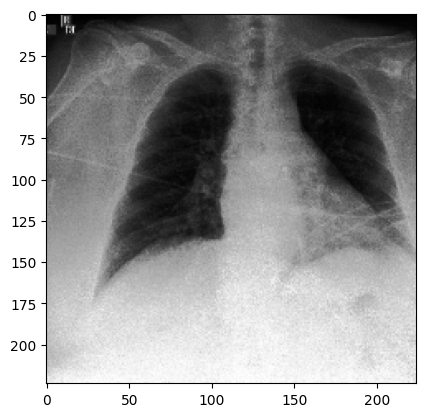

In [7]:
plt.imshow(d_chex[0]['img'].squeeze(), cmap='gray')
plt.show()

In [ ]:
# Load files for val and validation 
# chex_test_labels = pd.read_csv("/data/healthy-ml/gobi1/data/CheXpert/test_labels.csv")
# print(len(chex_test_labels))
# chex_test_labels.head()

In [ ]:
# chex_val_labels = pd.read_csv("/data/healthy-ml/gobi1/data/CheXpert/val_labels.csv")
# print(len(chex_val_labels))
# chex_val_labels.head()

In [8]:
# PadChest: A large chest x-ray image dataset with multi-label annotated reports. https://arxiv.org/abs/1901.07441
d_pc = xrv.datasets.PC_Dataset(imgpath="/data/healthy-ml/gobi1/data/PadChest/images-224", 
                               transform=transform, views=["PA", "AP"], unique_patients=False)

In [9]:
d_pc.pathologies

['Air Trapping',
 'Aortic Atheromatosis',
 'Aortic Elongation',
 'Atelectasis',
 'Bronchiectasis',
 'Cardiomegaly',
 'Consolidation',
 'Costophrenic Angle Blunting',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Flattened Diaphragm',
 'Fracture',
 'Granuloma',
 'Hemidiaphragm Elevation',
 'Hernia',
 'Hilar Enlargement',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax',
 'Scoliosis',
 'Support Devices',
 'Tube',
 'Tuberculosis']

In [10]:
print(len(d_pc))

94815


In [11]:
d_pc[0]

{'idx': 0,
 'lab': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 'img': array([[[  487.99182,   485.17932,   489.64807, ...,  -284.6137 ,
           -283.89496,  -275.58234],
         [  490.42932,   492.30444,   505.67957, ...,  -897.2793 ,
           -897.9668 ,  -896.3418 ],
         [  533.7113 ,   536.8988 ,   541.9302 , ..., -1024.     ,
          -1024.     , -1024.     ],
         ...,
         [  368.95874,   369.9275 ,   462.0852 , ...,   990.3745 ,
            986.3744 ,  1007.7185 ],
         [  674.9321 ,   674.9321 ,   798.40283, ...,  1024.     ,
           1024.     ,  1024.     ],
         [  398.08423,   401.67798,   539.86755, ...,   789.7777 ,
            784.12134,   788.9027 ]]], dtype=float32)}

In [12]:
# MIMIC-CXR 
d_mimic = xrv.datasets.MIMIC_Dataset(imgpath="/data/healthy-ml/gobi1/data/MIMIC-CXR-JPG/files", 
                                    csvpath="/data/healthy-ml/gobi1/data/MIMIC-CXR-JPG/mimic-cxr-2.0.0-chexpert.csv.gz", 
                                    metacsvpath="/data/healthy-ml/gobi1/data/MIMIC-CXR-JPG/mimic-cxr-2.0.0-metadata.csv.gz", 
                                    transform=transform, views=["AP", "PA"], unique_patients=False)

In [13]:
d_mimic.pathologies

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Enlarged Cardiomediastinum',
 'Fracture',
 'Lung Lesion',
 'Lung Opacity',
 'Effusion',
 'Pleural Other',
 'Pneumonia',
 'Pneumothorax',
 'Support Devices']

In [14]:
print(len(d_mimic))

243324


In [15]:
# National Institutes of Health ChestX-ray14 dataset. https://arxiv.org/abs/1705.02315
d_nih = xrv.datasets.NIH_Dataset(imgpath="/data/healthy-ml/gobi1/data/ChestXray8/images",
                                 transform=transform, views=["PA","AP"], unique_patients=False)

In [16]:
d_nih

{'Atelectasis': {0.0: 100561, 1.0: 11559},
 'Cardiomegaly': {0.0: 109344, 1.0: 2776},
 'Consolidation': {0.0: 107453, 1.0: 4667},
 'Edema': {0.0: 109817, 1.0: 2303},
 'Effusion': {0.0: 98803, 1.0: 13317},
 'Emphysema': {0.0: 109604, 1.0: 2516},
 'Fibrosis': {0.0: 110434, 1.0: 1686},
 'Hernia': {0.0: 111893, 1.0: 227},
 'Infiltration': {0.0: 92226, 1.0: 19894},
 'Mass': {0.0: 106338, 1.0: 5782},
 'Nodule': {0.0: 105789, 1.0: 6331},
 'Pleural_Thickening': {0.0: 108735, 1.0: 3385},
 'Pneumonia': {0.0: 110689, 1.0: 1431},
 'Pneumothorax': {0.0: 106818, 1.0: 5302}}


NIH_Dataset num_samples=112120 views=['PA', 'AP'] data_aug=None

In [17]:
d_nih.pathologies

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [18]:
print(len(d_nih.pathologies))

14


In [19]:
print(len(d_nih))

112120


In [20]:
# Split is not exactly 70% -> 77%, ignore 
# nih_train_val = pd.read_csv("/data/healthy-ml/gobi1/data/ChestXray8/train_val_list.txt", sep=" ", header=None)
# nih_train_val

In [ ]:
# nih_test = pd.read_csv("/data/healthy-ml/gobi1/data/ChestXray8/test_list.txt", sep=" ", header=None)
# nih_test

# Standardize labels

In [21]:
# The 8 target pathologies to standardize to 
pathologies = ["Atelectasis", "Cardiomegaly", "Consolidation", "Edema", 
               "Lesion", "Pneumonia", "Pneumothorax", "No Finding"]

In [22]:
# Standardization for NIH 
new_labels = pd.DataFrame(d_nih.labels, columns = d_nih.pathologies)
# Combine "Mass" and "Nodule" as "Lesion" class
new_labels['Lesion'] = new_labels['Mass'] + new_labels['Nodule']
new_labels['Lesion'][new_labels['Lesion'] > 1] = 1
# If all negative findings for original labels, set as no finding  
new_labels['No Finding'] = new_labels.eq(0).all(axis=1).astype(float)
d_nih.pathologies = new_labels.columns.values
d_nih.labels = new_labels.values

In [23]:
xrv.datasets.relabel_dataset(pathologies, d_nih)

{'Nodule', 'Pleural_Thickening', 'Mass', 'Emphysema', 'Fibrosis', 'Effusion', 'Infiltration', 'Hernia'} will be dropped


In [24]:
d_nih.pathologies

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Lesion',
 'Pneumonia',
 'Pneumothorax',
 'No Finding']

In [25]:
# NOTE: No finding does not exclude support devices and tubes 

In [26]:
# Standardization for PadChest 
new_labels = pd.DataFrame(d_pc.labels, columns = d_pc.pathologies) 
# Combine "Mass" and "Nodule" as "Lesion" class
new_labels['Lesion'] = new_labels['Mass'] + new_labels['Nodule']
new_labels['Lesion'][new_labels['Lesion'] > 1] = 1

In [27]:
no_findings_list = list(new_labels.columns)
no_findings_list.remove("Support Devices") 
no_findings_list.remove("Tube") 
print(no_findings_list)

['Air Trapping', 'Aortic Atheromatosis', 'Aortic Elongation', 'Atelectasis', 'Bronchiectasis', 'Cardiomegaly', 'Consolidation', 'Costophrenic Angle Blunting', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Flattened Diaphragm', 'Fracture', 'Granuloma', 'Hemidiaphragm Elevation', 'Hernia', 'Hilar Enlargement', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax', 'Scoliosis', 'Tuberculosis', 'Lesion']


In [28]:
# If all negative findings for selected labels, set as no finding  
new_labels['No Finding'] = new_labels[no_findings_list].eq(0).all(axis=1).astype(float)
d_pc.pathologies = new_labels.columns.values
d_pc.labels = new_labels.values

In [29]:
xrv.datasets.relabel_dataset(pathologies, d_pc)

{'Fracture', 'Flattened Diaphragm', 'Nodule', 'Scoliosis', 'Pleural_Thickening', 'Costophrenic Angle Blunting', 'Air Trapping', 'Aortic Atheromatosis', 'Support Devices', 'Granuloma', 'Mass', 'Hemidiaphragm Elevation', 'Aortic Elongation', 'Bronchiectasis', 'Tube', 'Emphysema', 'Fibrosis', 'Hilar Enlargement', 'Effusion', 'Infiltration', 'Hernia', 'Tuberculosis'} will be dropped


In [30]:
d_pc.pathologies

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Lesion',
 'Pneumonia',
 'Pneumothorax',
 'No Finding']

In [31]:
# Standardization for CheXpert 
d_chex.pathologies = ["Lesion" if x == "Lung Lesion" else x for x in d_chex.pathologies]

In [32]:
new_labels = pd.DataFrame(d_chex.labels, columns = d_chex.pathologies) 
no_findings_list = list(new_labels.columns)
no_findings_list.remove("Support Devices") 
print(no_findings_list)

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lesion', 'Lung Opacity', 'Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax']


In [33]:
# If all negative findings for selected labels, set as no finding  
new_labels['No Finding'] = new_labels[no_findings_list].eq(0).all(axis=1).astype(float)
d_chex.pathologies = new_labels.columns.values
d_chex.labels = new_labels.values

In [34]:
xrv.datasets.relabel_dataset(pathologies, d_chex)

{'Pleural Other', 'Fracture', 'Enlarged Cardiomediastinum', 'Effusion', 'Support Devices', 'Lung Opacity'} will be dropped


In [35]:
d_chex.pathologies

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Lesion',
 'Pneumonia',
 'Pneumothorax',
 'No Finding']

In [36]:
# Standardization for MIMIC-CXR 
d_mimic.pathologies = ["Lesion" if x == "Lung Lesion" else x for x in d_mimic.pathologies]
new_labels = pd.DataFrame(d_mimic.labels, columns = d_mimic.pathologies) 
no_findings_list = list(new_labels.columns)
no_findings_list.remove("Support Devices") 
print(no_findings_list)
# If all negative findings for selected labels, set as no finding  
new_labels['No Finding'] = new_labels[no_findings_list].eq(0).all(axis=1).astype(float)
d_mimic.pathologies = new_labels.columns.values
d_mimic.labels = new_labels.values

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lesion', 'Lung Opacity', 'Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax']


In [37]:
xrv.datasets.relabel_dataset(pathologies, d_mimic)

{'Pleural Other', 'Fracture', 'Enlarged Cardiomediastinum', 'Effusion', 'Support Devices', 'Lung Opacity'} will be dropped


In [38]:
d_mimic.pathologies

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Lesion',
 'Pneumonia',
 'Pneumothorax',
 'No Finding']

# Train-Val-Test Split

In [39]:
from sklearn.model_selection import GroupShuffleSplit

In [40]:
# For reproducibility 
seed = 0 

In [41]:
original_datasets = {"mimic": d_mimic, 
                     "chexpert": d_chex, 
                     "nih": d_nih, 
                     "padchest": d_pc} 
split_datasets = {}

In [42]:
gss = GroupShuffleSplit(train_size=0.8,test_size=0.2, random_state=seed)
gss_val = GroupShuffleSplit(train_size=0.875,test_size=0.125, random_state=seed)

for name, dataset in original_datasets.items(): 
    train_inds, test_inds = next(gss.split(X=range(len(dataset)), groups=dataset.csv.patientid))
    train_inds, val_inds = next(gss_val.split(X=range(len(train_inds)), groups=train_inds))

    split_datasets[name] = {}
    split_datasets[name]["train"] = xrv.datasets.SubsetDataset(dataset, train_inds)
    split_datasets[name]["val"] = xrv.datasets.SubsetDataset(dataset, val_inds)
    split_datasets[name]["test"] = xrv.datasets.SubsetDataset(dataset, test_inds)

In [47]:
total = 0
for name, dataset in split_datasets.items(): 
    print(f"{name} train: {len(dataset['train'])}")
    total += len(dataset['train'])
print(total)

mimic train: 170509
chexpert train: 134585
nih train: 78631
padchest train: 66330
450055


In [46]:
for name, dataset in split_datasets.items(): 
    print(f"{name} test: {len(dataset['test'])}")

mimic test: 48456
chexpert test: 37198
nih test: 22256
padchest test: 19009


# Reproduce Table 2 

In [1]:
model_names = ["mimic", "chexpert", "padchest", "nih", "all"]
dataset_names = ["mimic", "chexpert", "padchest", "nih",]
grid = []
for model_name in model_names: 
    for dataset_name in dataset_names: 
        grid.append((model_name, dataset_name))

In [3]:
grid

[('mimic', 'mimic'),
 ('mimic', 'chexpert'),
 ('mimic', 'padchest'),
 ('mimic', 'nih'),
 ('chexpert', 'mimic'),
 ('chexpert', 'chexpert'),
 ('chexpert', 'padchest'),
 ('chexpert', 'nih'),
 ('padchest', 'mimic'),
 ('padchest', 'chexpert'),
 ('padchest', 'padchest'),
 ('padchest', 'nih'),
 ('nih', 'mimic'),
 ('nih', 'chexpert'),
 ('nih', 'padchest'),
 ('nih', 'nih'),
 ('all', 'mimic'),
 ('all', 'chexpert'),
 ('all', 'padchest'),
 ('all', 'nih')]

In [44]:
from tqdm import tqdm

In [141]:
# Debug specific model 
model_name = "mimic"
model = xrv.models.DenseNet(weights="densenet121-res224-mimic_ch")

In [ ]:
# Function that convert the model output to standard 8 labels 
output_mapping = {
    "mimic": [0, 10, 1, 4, 14, 8, 3], 
    "chexpert": [0, 10, 1, 4, 14, 8, 3], 
    "padchest": [0, 10, 1, 4, 8, 3], 
    "nih": [0, 10, 1, 4, 8, 3], 
    "all": [0, 10, 1, 4, 14, 8, 3],
}

In [139]:
def convert_output(model_name, outputs): 
    new_outputs = outputs[:, output_mapping[model_name]]

    if model_name == "padchest" or model_name == "nih": 
        lesion = torch.max(outputs[:, 11], outputs[:, 12])
        new_outputs = torch.hstack((new_outputs[:, :4], lesion.unsqueeze(1), new_outputs[:, 4:]))

    # Append "No Findings" output as last column 
    no_finding_output = outputs[:, [i for i, x in enumerate(model.pathologies) if x != '']]
    # Max probability over all class with positive finding, then take the inverse 
    no_finding = 1. - no_finding_output.max(axis=1)[0]
    new_outputs = torch.hstack((new_outputs, no_finding.unsqueeze(1)))
    return new_outputs

In [143]:
from sklearn.metrics import roc_auc_score

In [144]:
# Adapted from torchxrayvision train_utils
def valid_test_epoch(name, epoch, model, model_name, device, data_loader, criterion, limit=None):
    model.to(device)
    model.eval()

    avg_loss = []
    task_outputs={}
    task_targets={}
    for task in range(data_loader.dataset[0]["lab"].shape[0]):
        task_outputs[task] = []
        task_targets[task] = []
        
    with torch.no_grad():
        t = tqdm(data_loader)
        for batch_idx, samples in enumerate(t):

            if limit and (batch_idx > limit):
                print("breaking out")
                break
            
            images = samples["img"].to(device)
            targets = samples["lab"].to(device)

            outputs = model(images)
            outputs = convert_output(model_name, outputs)
            
            loss = torch.zeros(1).to(device).double()
            for task in range(targets.shape[1]):
                task_output = outputs[:,task]
                task_target = targets[:,task]
                mask = ~torch.isnan(task_target)
                task_output = task_output[mask]
                task_target = task_target[mask]
                if len(task_target) > 0:
                    loss += criterion(task_output.double(), task_target.double())
                
                task_outputs[task].append(task_output.detach().cpu().numpy())
                task_targets[task].append(task_target.detach().cpu().numpy())

            loss = loss.sum()
            
            avg_loss.append(loss.detach().cpu().numpy())
            t.set_description(f'Epoch {epoch + 1} - {name} - Loss = {np.mean(avg_loss):4.4f}')
            
        for task in range(len(task_targets)):
            task_outputs[task] = np.concatenate(task_outputs[task])
            task_targets[task] = np.concatenate(task_targets[task])
    
        task_aucs = []
        for task in range(len(task_targets)):
            if len(np.unique(task_targets[task]))> 1:
                task_auc = roc_auc_score(task_targets[task], task_outputs[task])
                task_aucs.append(task_auc)
            else:
                task_aucs.append(np.nan)

    task_aucs = np.asarray(task_aucs)
    auc = np.mean(task_aucs[~np.isnan(task_aucs)])
    print(f'Epoch {epoch + 1} - {name} - Avg AUC = {auc:4.4f}')

    return auc, task_aucs, task_outputs, task_targets

In [46]:
data_loader = torch.utils.data.DataLoader(split_datasets["mimic"]["test"], batch_size=8, shuffle=False)

In [ ]:
auc, task_aucs, task_outputs, task_targets = valid_test_epoch("test", 0, model, model_name, 
                                                              "cuda", data_loader, torch.nn.BCEWithLogitsLoss())

Epoch 1 - test - Loss = 5.8617:   5%|▊               | 296/6057 [18:12<6:01:04,  3.76s/it]

In [ ]:
print(auc)
print(task_aucs)

In [150]:
import pickle

In [ ]:
with open("mimic_mimic_auc.pkl", "wb") as f: 
    pickle.dump(auc, f) 
    
with open("mimic_mimic_task_auc.pkl", "wb") as f: 
    pickle.dump(task_aucs, f) 

with open("mimic_mimic_task_outputs.pkl", "wb") as f: 
    pickle.dump(task_outputs, f) 

with open("mimic_mimic_task_targets.pkl", "wb") as f: 
    pickle.dump(task_targets, f) 

In [154]:
with open("mimic_mimic_auc.pkl", "rb") as f: 
    auc = pickle.load(f) 
    
with open("mimic_mimic_task_outputs.pkl", "rb") as f: 
    task_outputs = pickle.load(f) 

In [ ]:
# Second set of results 
data_loader = torch.utils.data.DataLoader(split_datasets["chexpert"]["test"], batch_size=8, shuffle=False)

auc, task_aucs, task_outputs, task_targets = valid_test_epoch("test", 0, model, model_name, 
                                                              "cuda", data_loader, torch.nn.BCEWithLogitsLoss())

In [ ]:
with open("mimic_chexpert_auc.pkl", "wb") as f: 
    pickle.dump(auc, f) 
    
with open("mimic_chexpert_task_auc.pkl", "wb") as f: 
    pickle.dump(task_aucs, f) 

with open("mimic_chexpert_task_outputs.pkl", "wb") as f: 
    pickle.dump(task_outputs, f) 

with open("mimic_chexpert_task_targets.pkl", "wb") as f: 
    pickle.dump(task_targets, f) 

In [133]:
# model weights 
models = {
    "mimic": "densenet121-res224-mimic_ch", 
    "chexpert": "densenet121-res224-chex", 
    "nih": "densenet121-res224-nih", 
    "padchest": "densenet121-res224-pc", 
    "all": "densenet121-res224-all"
}

In [ ]:
df_results = pd.DataFrame(index=)
for dataset_name, datasets in split_datasets.items(): 
    for model_name, model_weight_name in models.items(): 
        images = samples["img"].to(device)
        targets = samples["lab"].to(device)

        outputs = model(images)

# Make Table of Results

In [2]:
# The 8 target pathologies to standardize to 
pathologies = ["Atelectasis", "Cardiomegaly", "Consolidation", "Edema", 
               "Lesion", "Pneumonia", "Pneumothorax", "No Finding"]

In [3]:
from glob import glob
import pickle

In [71]:
# Baseline results with only default torchxrayvision 
results_dir = "table2_reproduce"

In [72]:
task_auc_paths = glob(results_dir + "/*_task_aucs.pkl", recursive=True)
print(task_auc_paths)

['table2_reproduce/nih_nih_task_aucs.pkl', 'table2_reproduce/nih_padchest_task_aucs.pkl', 'table2_reproduce/padchest_padchest_task_aucs.pkl', 'table2_reproduce/chexpert_nih_task_aucs.pkl', 'table2_reproduce/padchest_mimic_task_aucs.pkl', 'table2_reproduce/mimic_padchest_task_aucs.pkl', 'table2_reproduce/all_padchest_task_aucs.pkl', 'table2_reproduce/chexpert_padchest_task_aucs.pkl', 'table2_reproduce/all_nih_task_aucs.pkl', 'table2_reproduce/nih_chexpert_task_aucs.pkl', 'table2_reproduce/mimic_mimic_task_aucs.pkl', 'table2_reproduce/padchest_chexpert_task_aucs.pkl', 'table2_reproduce/mimic_chexpert_task_aucs.pkl', 'table2_reproduce/chexpert_mimic_task_aucs.pkl', 'table2_reproduce/all_chexpert_task_aucs.pkl', 'table2_reproduce/all_mimic_task_aucs.pkl', 'table2_reproduce/mimic_nih_task_aucs.pkl', 'table2_reproduce/padchest_nih_task_aucs.pkl', 'table2_reproduce/nih_mimic_task_aucs.pkl', 'table2_reproduce/chexpert_chexpert_task_aucs.pkl']


In [73]:
auc_paths = glob(results_dir + "/*_auc.pkl", recursive=True)
print(auc_paths)

['table2_reproduce/mimic_mimic_auc.pkl', 'table2_reproduce/all_padchest_auc.pkl', 'table2_reproduce/mimic_chexpert_auc.pkl', 'table2_reproduce/mimic_nih_auc.pkl', 'table2_reproduce/nih_padchest_auc.pkl', 'table2_reproduce/padchest_chexpert_auc.pkl', 'table2_reproduce/padchest_mimic_auc.pkl', 'table2_reproduce/chexpert_nih_auc.pkl', 'table2_reproduce/chexpert_chexpert_auc.pkl', 'table2_reproduce/all_mimic_auc.pkl', 'table2_reproduce/all_nih_auc.pkl', 'table2_reproduce/nih_nih_auc.pkl', 'table2_reproduce/chexpert_mimic_auc.pkl', 'table2_reproduce/chexpert_padchest_auc.pkl', 'table2_reproduce/padchest_padchest_auc.pkl', 'table2_reproduce/mimic_padchest_auc.pkl', 'table2_reproduce/nih_mimic_auc.pkl', 'table2_reproduce/all_chexpert_auc.pkl', 'table2_reproduce/padchest_nih_auc.pkl', 'table2_reproduce/nih_chexpert_auc.pkl']


In [74]:
df_results = pd.DataFrame(columns = ["test_set", "train_set"] + pathologies)
for path in task_auc_paths: 
    test_set = path.split("/")[1].split("_")[1]
    train_set = path.split("/")[1].split("_")[0]
    with open(path, "rb") as f: 
        task_auc = pickle.load(f) 
    df_results = pd.concat([df_results, pd.DataFrame([test_set, train_set] + list(task_auc), 
                                                     index=df_results.columns).T], axis=0, ignore_index=True)

In [75]:
df_results['Mean'] = np.nan

In [76]:
for path in auc_paths: 
    test_set = path.split("/")[1].split("_")[1]
    train_set = path.split("/")[1].split("_")[0]
    with open(path, "rb") as f: 
        auc = pickle.load(f) 
    df_results.loc[(df_results['test_set'] == test_set) & \
              (df_results['train_set'] == train_set), 'Mean'] = auc

In [77]:
df_results[pathologies + ['Mean']] = df_results[pathologies + ['Mean']].astype(float).round(4)

In [79]:
df_results.sort_values(['test_set', 'train_set']).to_csv("results/reproduced_table2.csv", index=False)

In [80]:
df_results.sort_values(['test_set', 'train_set'])

,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
14,chexpert,all,0.8636,0.9209,0.9207,0.8960,0.8463,0.8713,0.7609,0.8555,0.8669
19,chexpert,chexpert,0.8511,0.9111,0.9096,0.8826,0.8107,0.8543,0.7367,0.8436,0.8500
12,chexpert,mimic,0.8192,0.8671,0.8478,0.8523,0.7501,0.7757,0.6690,0.7944,0.7969
9,chexpert,nih,0.7585,0.7865,0.8013,0.7382,0.6555,0.6270,0.6361,0.7630,0.7208
11,chexpert,padchest,0.7307,0.8272,0.8421,0.8222,0.6975,0.7208,0.6616,0.7836,0.7607
15,mimic,all,0.8775,0.8740,0.9105,0.9163,0.8167,0.7981,0.7971,0.8225,0.8516
13,mimic,chexpert,0.8525,0.8532,0.8760,0.8973,0.7682,0.7687,0.7567,0.8032,0.8220
10,mimic,mimic,0.8700,0.8560,0.8862,0.8919,0.7814,0.7881,0.7648,0.8152,0.8317
18,mimic,nih,0.7910,0.7435,0.8289,0.8197,0.7102,0.7093,0.7053,0.7500,0.7572
4,mimic,padchest,0.7955,0.7980,0.8759,0.8855,0.6940,0.7668,0.7318,0.7856,0.7916


## CutMix + Mixup results

In [4]:
results_dir = "/data/healthy-ml/scratch/qixuanj/generative_validation/cutmix_results_new2/eval"
train_nums = [10, 50, 100, 250, 500, 1000]
seed = 0

In [16]:
config = "match" 

for train_num in train_nums: 
    task_auc_paths = glob(results_dir + f"/{train_num}/{seed}" + "/*_task_aucs.pkl", recursive=True)
    task_auc_paths = [x for x in task_auc_paths if config in x]
    auc_paths = glob(results_dir + f"/{train_num}/{seed}" + "/*_auc.pkl", recursive=True)
    auc_paths = [x for x in auc_paths if config in x]

    df_results = pd.DataFrame(columns = ["test_set", "train_set"] + pathologies)
    for path in task_auc_paths: 
        test_set = path.split("/")[-1].split("_")[1]
        train_set = path.split("/")[-1].split("_")[0]
        with open(path, "rb") as f: 
            task_auc = pickle.load(f) 
        df_results = pd.concat([df_results, pd.DataFrame([test_set, train_set] + list(task_auc), 
                                                         index=df_results.columns).T], axis=0, ignore_index=True)
    df_results['Mean'] = np.nan
    for path in auc_paths: 
        test_set = path.split("/")[-1].split("_")[1]
        train_set = path.split("/")[-1].split("_")[0]
        with open(path, "rb") as f: 
            auc = pickle.load(f) 
        df_results.loc[(df_results['test_set'] == test_set) & \
                  (df_results['train_set'] == train_set), 'Mean'] = auc
    df_results[pathologies + ['Mean']] = df_results[pathologies + ['Mean']].astype(float).round(4)
    df_results = df_results.sort_values(['test_set', 'train_set'])
    print(f"cutmix {config} {train_num}")
    display(df_results)
    df_results.to_csv(f"results/cxr_cutmix_{config}_{train_num}.csv", index=False)

cutmix match 10


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
0,chexpert,padchest,0.7348,0.6238,0.8258,0.8023,0.6940,0.8029,0.5665,0.8211,0.7339
5,mimic,chexpert,0.8555,0.8545,0.8629,0.8938,0.7389,0.7707,0.6852,0.8068,0.8086
1,mimic,padchest,0.6459,0.7008,0.8453,0.8491,0.6655,0.7673,0.6289,0.8024,0.7382
3,nih,chexpert,0.6825,0.6473,0.7166,0.8102,0.5743,0.6190,0.6477,0.6904,0.6735
4,nih,padchest,0.6575,0.7591,0.7247,0.8074,0.5832,0.6401,0.5778,0.6952,0.6806
2,padchest,chexpert,0.7077,0.8478,0.8153,0.9306,0.6188,0.7022,0.8256,0.7309,0.7723


cutmix match 50


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
2,chexpert,padchest,0.7545,0.7109,0.8481,0.8380,0.7103,0.8062,0.5970,0.8170,0.7603
3,mimic,chexpert,0.8534,0.8483,0.8707,0.8885,0.7399,0.7682,0.7193,0.7977,0.8107
1,mimic,padchest,0.7196,0.7082,0.8471,0.8633,0.7088,0.7784,0.6715,0.8065,0.7629
4,nih,chexpert,0.6737,0.6425,0.7115,0.8067,0.5882,0.6317,0.6664,0.6807,0.6752
5,nih,padchest,0.6656,0.8216,0.7213,0.7921,0.5696,0.6585,0.5775,0.6904,0.6871
0,padchest,chexpert,0.7086,0.8508,0.8217,0.9309,0.6232,0.6888,0.7956,0.7327,0.7690


cutmix match 100


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
1,chexpert,padchest,0.7014,0.6637,0.8328,0.8191,0.6842,0.8070,0.5380,0.8213,0.7335
0,mimic,chexpert,0.8589,0.8572,0.8735,0.8944,0.7448,0.7723,0.7380,0.8007,0.8175
2,mimic,padchest,0.7349,0.7155,0.8346,0.8500,0.7315,0.7716,0.6817,0.8039,0.7655
3,nih,chexpert,0.6703,0.6455,0.7113,0.7921,0.5557,0.5862,0.6544,0.6684,0.6605
4,nih,padchest,0.5819,0.7647,0.6756,0.7193,0.5802,0.6557,0.5923,0.6639,0.6542
5,padchest,chexpert,0.7074,0.8363,0.8022,0.9293,0.6111,0.6856,0.7534,0.7276,0.7566


cutmix match 250


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
1,chexpert,padchest,0.7528,0.7059,0.8459,0.8244,0.6976,0.7960,0.5967,0.8073,0.7533
0,mimic,chexpert,0.8658,0.8617,0.8824,0.8984,0.7553,0.7781,0.7276,0.8091,0.8223
4,mimic,padchest,0.7723,0.7425,0.8348,0.8617,0.7199,0.7746,0.6745,0.8005,0.7726
3,nih,chexpert,0.6755,0.6391,0.7226,0.8056,0.5652,0.6278,0.6788,0.6840,0.6748
2,nih,padchest,0.6696,0.8018,0.7175,0.8056,0.5684,0.6579,0.5706,0.6930,0.6856
5,padchest,chexpert,0.7046,0.8392,0.8178,0.9262,0.6014,0.6915,0.8136,0.7252,0.7649


cutmix match 500


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
2,chexpert,padchest,0.7377,0.6430,0.8422,0.8257,0.7140,0.8053,0.5902,0.8243,0.7478
3,mimic,chexpert,0.8641,0.8585,0.8811,0.8969,0.7485,0.7778,0.7243,0.8109,0.8203
1,mimic,padchest,0.7641,0.7212,0.8420,0.8659,0.7086,0.7715,0.6752,0.7838,0.7665
4,nih,chexpert,0.6768,0.6530,0.7236,0.8024,0.5583,0.6122,0.6780,0.6790,0.6729
5,nih,padchest,0.6652,0.8195,0.7278,0.7929,0.5689,0.6592,0.5988,0.6854,0.6897
0,padchest,chexpert,0.7064,0.8455,0.8158,0.9311,0.6136,0.6965,0.8253,0.7240,0.7698


cutmix match 1000


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
4,chexpert,padchest,0.7579,0.6792,0.8405,0.8429,0.7276,0.7931,0.6196,0.8077,0.7586
1,mimic,chexpert,0.8574,0.8489,0.8729,0.8927,0.7433,0.7694,0.7125,0.8079,0.8131
5,mimic,padchest,0.7764,0.7296,0.8570,0.8662,0.7140,0.7756,0.6609,0.7978,0.7722
3,nih,chexpert,0.6625,0.6536,0.7177,0.8033,0.5604,0.6166,0.6618,0.6748,0.6688
2,nih,padchest,0.6468,0.7592,0.7112,0.7729,0.5535,0.6458,0.5810,0.6867,0.6696
0,padchest,chexpert,0.7040,0.8485,0.8086,0.9296,0.5986,0.6877,0.7661,0.7222,0.7582


In [17]:
config = "balanced" 

for train_num in train_nums: 
    task_auc_paths = glob(results_dir + f"/{train_num}/{seed}" + "/*_task_aucs.pkl", recursive=True)
    task_auc_paths = [x for x in task_auc_paths if config in x]
    auc_paths = glob(results_dir + f"/{train_num}/{seed}" + "/*_auc.pkl", recursive=True)
    auc_paths = [x for x in auc_paths if config in x]

    df_results = pd.DataFrame(columns = ["test_set", "train_set"] + pathologies)
    for path in task_auc_paths: 
        test_set = path.split("/")[-1].split("_")[1]
        train_set = path.split("/")[-1].split("_")[0]
        with open(path, "rb") as f: 
            task_auc = pickle.load(f) 
        df_results = pd.concat([df_results, pd.DataFrame([test_set, train_set] + list(task_auc), 
                                                         index=df_results.columns).T], axis=0, ignore_index=True)
    df_results['Mean'] = np.nan
    for path in auc_paths: 
        test_set = path.split("/")[-1].split("_")[1]
        train_set = path.split("/")[-1].split("_")[0]
        with open(path, "rb") as f: 
            auc = pickle.load(f) 
        df_results.loc[(df_results['test_set'] == test_set) & \
                  (df_results['train_set'] == train_set), 'Mean'] = auc
    df_results[pathologies + ['Mean']] = df_results[pathologies + ['Mean']].astype(float).round(4)
    df_results = df_results.sort_values(['test_set', 'train_set'])
    print(f"cutmix {config} {train_num}")
    display(df_results)
    df_results.to_csv(f"results/cxr_cutmix_{config}_{train_num}.csv", index=False)

cutmix balanced 10


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
0,chexpert,padchest,0.7507,0.7012,0.8431,0.8387,0.7178,0.8109,0.5800,0.8269,0.7587
2,mimic,chexpert,0.8552,0.8523,0.8697,0.8915,0.7421,0.7665,0.7148,0.7986,0.8113
3,mimic,padchest,0.7193,0.6827,0.8556,0.8473,0.6935,0.7764,0.6549,0.8085,0.7548
5,nih,chexpert,0.6815,0.6297,0.7262,0.7984,0.5585,0.6194,0.6396,0.6872,0.6676
1,nih,padchest,0.6726,0.7851,0.7248,0.8004,0.5789,0.6639,0.5810,0.7077,0.6893
4,padchest,chexpert,0.7114,0.8142,0.8012,0.9259,0.6031,0.6726,0.7785,0.7211,0.7535


cutmix balanced 50


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
2,chexpert,padchest,0.8125,0.7807,0.8597,0.8566,0.7426,0.8076,0.6223,0.8303,0.7890
3,mimic,chexpert,0.8569,0.8506,0.8743,0.8897,0.7581,0.7722,0.7101,0.8039,0.8145
4,mimic,padchest,0.7933,0.7740,0.8634,0.8811,0.7254,0.7752,0.7040,0.8021,0.7898
1,nih,chexpert,0.6786,0.6563,0.7362,0.8211,0.5677,0.6503,0.6599,0.6969,0.6834
5,nih,padchest,0.6819,0.8039,0.7205,0.8062,0.5648,0.6592,0.6029,0.6943,0.6917
0,padchest,chexpert,0.7097,0.8502,0.8120,0.9349,0.6115,0.6901,0.7777,0.7272,0.7642


cutmix balanced 100


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
5,chexpert,padchest,0.8000,0.7534,0.8697,0.8611,0.7329,0.8144,0.6065,0.8273,0.7832
2,mimic,chexpert,0.8570,0.8497,0.8794,0.8936,0.7501,0.7747,0.7003,0.8028,0.8135
1,mimic,padchest,0.7705,0.7557,0.8485,0.8854,0.7291,0.7790,0.6809,0.8059,0.7819
0,nih,chexpert,0.6692,0.6357,0.7177,0.8135,0.5704,0.6222,0.6560,0.6865,0.6714
4,nih,padchest,0.6691,0.7904,0.7123,0.7823,0.5617,0.6456,0.5986,0.6759,0.6795
3,padchest,chexpert,0.7094,0.8247,0.8221,0.9348,0.6155,0.6983,0.8035,0.7218,0.7663


cutmix balanced 250


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
5,chexpert,padchest,0.7642,0.7437,0.8424,0.8601,0.7196,0.8060,0.6062,0.8273,0.7712
0,mimic,chexpert,0.8589,0.8543,0.8805,0.8941,0.7498,0.7719,0.6969,0.8078,0.8143
1,mimic,padchest,0.7745,0.7631,0.8347,0.8733,0.7261,0.7742,0.6830,0.7969,0.7782
3,nih,chexpert,0.6770,0.6504,0.7242,0.8058,0.5700,0.6347,0.6586,0.6920,0.6766
4,nih,padchest,0.6671,0.7837,0.7252,0.7987,0.5574,0.6746,0.5873,0.6961,0.6863
2,padchest,chexpert,0.7119,0.8255,0.8217,0.9402,0.6147,0.6941,0.8098,0.7218,0.7675


cutmix balanced 500


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
2,chexpert,padchest,0.7938,0.6764,0.8630,0.8538,0.7299,0.8155,0.6091,0.8212,0.7703
4,mimic,chexpert,0.8585,0.8528,0.8758,0.8944,0.7445,0.7685,0.7234,0.7953,0.8142
5,mimic,padchest,0.7593,0.7981,0.8449,0.8842,0.7243,0.7804,0.6715,0.7873,0.7813
0,nih,chexpert,0.6808,0.6345,0.7186,0.8134,0.5761,0.6109,0.6204,0.6835,0.6673
3,nih,padchest,0.6694,0.8051,0.7205,0.8019,0.5724,0.6482,0.5987,0.6905,0.6883
1,padchest,chexpert,0.7122,0.8372,0.7993,0.9416,0.6014,0.6826,0.7772,0.7126,0.7580


cutmix balanced 1000


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
3,chexpert,padchest,0.7713,0.7058,0.8573,0.8491,0.7276,0.8135,0.6005,0.8197,0.7681
5,mimic,chexpert,0.8568,0.8514,0.8800,0.8927,0.7476,0.7717,0.7100,0.7981,0.8135
4,mimic,padchest,0.7865,0.7641,0.8517,0.8846,0.7460,0.7757,0.7148,0.8070,0.7913
2,nih,chexpert,0.6754,0.6446,0.7248,0.8121,0.5551,0.6247,0.6581,0.6780,0.6716
0,nih,padchest,0.6770,0.8068,0.7259,0.8013,0.5663,0.6415,0.6114,0.6848,0.6894
1,padchest,chexpert,0.7115,0.8315,0.8101,0.9384,0.6060,0.6926,0.7597,0.7016,0.7564


In [18]:
results_dir = "/data/healthy-ml/scratch/qixuanj/generative_validation/mixup_results_new2/eval"
train_nums = [10, 50, 100, 250, 500, 1000]
seed = 0

In [20]:
config = "match" 

for train_num in train_nums: 
    task_auc_paths = glob(results_dir + f"/{train_num}/{seed}" + "/*_task_aucs.pkl", recursive=True)
    task_auc_paths = [x for x in task_auc_paths if config in x]
    auc_paths = glob(results_dir + f"/{train_num}/{seed}" + "/*_auc.pkl", recursive=True)
    auc_paths = [x for x in auc_paths if config in x]

    df_results = pd.DataFrame(columns = ["test_set", "train_set"] + pathologies)
    for path in task_auc_paths: 
        test_set = path.split("/")[-1].split("_")[1]
        train_set = path.split("/")[-1].split("_")[0]
        with open(path, "rb") as f: 
            task_auc = pickle.load(f) 
        df_results = pd.concat([df_results, pd.DataFrame([test_set, train_set] + list(task_auc), 
                                                         index=df_results.columns).T], axis=0, ignore_index=True)
    df_results['Mean'] = np.nan
    for path in auc_paths: 
        test_set = path.split("/")[-1].split("_")[1]
        train_set = path.split("/")[-1].split("_")[0]
        with open(path, "rb") as f: 
            auc = pickle.load(f) 
        df_results.loc[(df_results['test_set'] == test_set) & \
                  (df_results['train_set'] == train_set), 'Mean'] = auc
    df_results[pathologies + ['Mean']] = df_results[pathologies + ['Mean']].astype(float).round(4)
    df_results = df_results.sort_values(['test_set', 'train_set'])
    print(f"mixup {config} {train_num}")
    display(df_results)
    df_results.to_csv(f"results/cxr_mixup_{config}_{train_num}.csv", index=False)

mixup match 10


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
5,chexpert,padchest,0.6808,0.6406,0.6467,0.7225,0.5885,0.6933,0.4884,0.7682,0.6536
2,mimic,chexpert,0.8671,0.8679,0.8778,0.8980,0.7633,0.7666,0.7011,0.8091,0.8188
4,mimic,padchest,0.5839,0.6278,0.6929,0.7420,0.5794,0.7057,0.5289,0.7973,0.6572
1,nih,chexpert,0.6778,0.7182,0.7159,0.8023,0.5656,0.6161,0.6152,0.6724,0.6729
0,nih,padchest,0.5993,0.7323,0.6724,0.7333,0.5511,0.6664,0.5552,0.6726,0.6478
3,padchest,chexpert,0.7027,0.8351,0.8108,0.9260,0.6165,0.6644,0.7765,0.7236,0.7569


mixup match 50


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
3,chexpert,padchest,0.7138,0.5938,0.7047,0.6920,0.6120,0.7194,0.5311,0.7732,0.6675
0,mimic,chexpert,0.8683,0.8674,0.8870,0.8996,0.7605,0.7749,0.7361,0.8094,0.8254
4,mimic,padchest,0.6246,0.7546,0.6576,0.8236,0.7075,0.5850,0.6821,0.7619,0.6996
2,nih,chexpert,0.6771,0.7194,0.7121,0.8044,0.5719,0.6160,0.6422,0.6767,0.6775
1,nih,padchest,0.6544,0.8022,0.6996,0.7745,0.5497,0.6692,0.5811,0.6620,0.6741
5,padchest,chexpert,0.7096,0.8578,0.8090,0.9348,0.6173,0.6847,0.8039,0.7282,0.7682


mixup match 100


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
5,chexpert,padchest,0.6874,0.6381,0.6942,0.7260,0.5935,0.7189,0.4987,0.8002,0.6696
4,mimic,chexpert,0.8641,0.8618,0.8864,0.9014,0.7595,0.7658,0.7141,0.8047,0.8197
2,mimic,padchest,0.6920,0.7731,0.7320,0.8214,0.7323,0.6798,0.6868,0.7526,0.7338
0,nih,chexpert,0.6764,0.7069,0.7230,0.8171,0.5424,0.6343,0.6470,0.6820,0.6787
1,nih,padchest,0.6292,0.7678,0.6887,0.7595,0.5687,0.6736,0.5564,0.6915,0.6669
3,padchest,chexpert,0.7001,0.8475,0.7985,0.9312,0.6047,0.6843,0.8350,0.7118,0.7641


mixup match 250


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
5,chexpert,padchest,0.7301,0.5812,0.7358,0.7495,0.6402,0.7136,0.5584,0.7951,0.6880
0,mimic,chexpert,0.8663,0.8657,0.8826,0.8953,0.7643,0.7697,0.7267,0.8066,0.8221
4,mimic,padchest,0.6780,0.7607,0.7180,0.8189,0.6876,0.6743,0.6537,0.7179,0.7137
2,nih,chexpert,0.6865,0.7116,0.7134,0.8079,0.5725,0.6231,0.6659,0.6896,0.6838
1,nih,padchest,0.6489,0.7789,0.6747,0.7476,0.5733,0.6696,0.5800,0.6384,0.6639
3,padchest,chexpert,0.6959,0.8569,0.7925,0.9267,0.6081,0.6605,0.7677,0.7211,0.7537


mixup match 500


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
0,chexpert,padchest,0.6907,0.7633,0.6730,0.7908,0.6901,0.6360,0.5695,0.7763,0.6987
5,mimic,chexpert,0.8637,0.8681,0.8821,0.9026,0.7683,0.7732,0.7180,0.8066,0.8228
1,mimic,padchest,0.7518,0.7097,0.8033,0.8232,0.6916,0.7603,0.6251,0.8057,0.7463
2,nih,chexpert,0.6793,0.7174,0.7276,0.8076,0.5619,0.6463,0.6268,0.6731,0.6800
3,nih,padchest,0.6268,0.7876,0.6544,0.7765,0.6033,0.6408,0.5945,0.6062,0.6613
4,padchest,chexpert,0.7012,0.8559,0.7826,0.9335,0.6104,0.6631,0.7505,0.7259,0.7529


mixup match 1000


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
0,chexpert,padchest,0.7196,0.6519,0.7267,0.7325,0.6512,0.7129,0.5515,0.7737,0.6900
1,mimic,chexpert,0.8701,0.8655,0.8851,0.9036,0.7570,0.7680,0.7202,0.8127,0.8228
5,mimic,padchest,0.7003,0.6651,0.7745,0.8019,0.6590,0.7486,0.6389,0.7735,0.7202
2,nih,chexpert,0.6844,0.7011,0.7191,0.7922,0.5688,0.6125,0.6328,0.6814,0.6740
3,nih,padchest,0.6560,0.7848,0.7115,0.7977,0.5721,0.6697,0.5536,0.6947,0.6800
4,padchest,chexpert,0.6935,0.8593,0.7999,0.9403,0.6006,0.6671,0.7833,0.7138,0.7572


In [21]:
config = "balanced" 

for train_num in train_nums: 
    task_auc_paths = glob(results_dir + f"/{train_num}/{seed}" + "/*_task_aucs.pkl", recursive=True)
    task_auc_paths = [x for x in task_auc_paths if config in x]
    auc_paths = glob(results_dir + f"/{train_num}/{seed}" + "/*_auc.pkl", recursive=True)
    auc_paths = [x for x in auc_paths if config in x]

    df_results = pd.DataFrame(columns = ["test_set", "train_set"] + pathologies)
    for path in task_auc_paths: 
        test_set = path.split("/")[-1].split("_")[1]
        train_set = path.split("/")[-1].split("_")[0]
        with open(path, "rb") as f: 
            task_auc = pickle.load(f) 
        df_results = pd.concat([df_results, pd.DataFrame([test_set, train_set] + list(task_auc), 
                                                         index=df_results.columns).T], axis=0, ignore_index=True)
    df_results['Mean'] = np.nan
    for path in auc_paths: 
        test_set = path.split("/")[-1].split("_")[1]
        train_set = path.split("/")[-1].split("_")[0]
        with open(path, "rb") as f: 
            auc = pickle.load(f) 
        df_results.loc[(df_results['test_set'] == test_set) & \
                  (df_results['train_set'] == train_set), 'Mean'] = auc
    df_results[pathologies + ['Mean']] = df_results[pathologies + ['Mean']].astype(float).round(4)
    df_results = df_results.sort_values(['test_set', 'train_set'])
    print(f"mixup {config} {train_num}")
    display(df_results)
    df_results.to_csv(f"results/cxr_mixup_{config}_{train_num}.csv", index=False)

mixup balanced 10


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
5,chexpert,padchest,0.7327,0.7040,0.6530,0.7387,0.6772,0.6083,0.5653,0.7455,0.6781
4,mimic,chexpert,0.8634,0.8667,0.8802,0.9036,0.7690,0.7690,0.7179,0.8070,0.8221
3,mimic,padchest,0.6863,0.6636,0.7604,0.8006,0.6717,0.7366,0.6356,0.7665,0.7152
0,nih,chexpert,0.6841,0.6938,0.7264,0.8174,0.5788,0.6675,0.6528,0.6963,0.6896
2,nih,padchest,0.6526,0.7962,0.6980,0.7787,0.5667,0.6635,0.5630,0.6790,0.6747
1,padchest,chexpert,0.7060,0.8426,0.8215,0.9425,0.6216,0.6797,0.8200,0.7266,0.7701


mixup balanced 50


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
3,chexpert,padchest,0.7396,0.7245,0.6905,0.7589,0.6708,0.6428,0.5636,0.7476,0.6923
1,mimic,chexpert,0.8675,0.8658,0.8868,0.8984,0.7535,0.7733,0.7044,0.8052,0.8194
0,mimic,padchest,0.7284,0.7017,0.7551,0.8245,0.6812,0.7389,0.6371,0.7826,0.7312
2,nih,chexpert,0.6832,0.6953,0.7233,0.8029,0.5596,0.6549,0.6465,0.6926,0.6823
5,nih,padchest,0.6353,0.7601,0.6505,0.7532,0.5598,0.6392,0.5760,0.6260,0.6500
4,padchest,chexpert,0.6988,0.8515,0.7904,0.9379,0.6186,0.6559,0.8163,0.6995,0.7586


mixup balanced 100


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
4,chexpert,padchest,0.7258,0.6180,0.7074,0.7160,0.6133,0.7183,0.5459,0.8031,0.6810
2,mimic,chexpert,0.8681,0.8678,0.8918,0.9004,0.7685,0.7756,0.7331,0.8065,0.8265
3,mimic,padchest,0.7452,0.6892,0.8006,0.8355,0.6846,0.7633,0.6482,0.7913,0.7447
5,nih,chexpert,0.6855,0.6890,0.7163,0.8158,0.5759,0.6382,0.6164,0.6768,0.6767
0,nih,padchest,0.6484,0.7862,0.6690,0.7703,0.5646,0.6350,0.5730,0.6359,0.6603
1,padchest,chexpert,0.7057,0.8523,0.8015,0.9434,0.6254,0.6758,0.8454,0.7125,0.7702


mixup balanced 250


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
0,chexpert,padchest,0.7320,0.7092,0.7516,0.7845,0.6680,0.7345,0.5698,0.7794,0.7161
3,mimic,chexpert,0.8729,0.8669,0.8972,0.9026,0.7627,0.7805,0.7361,0.8110,0.8288
4,mimic,padchest,0.7511,0.6812,0.7800,0.8273,0.7079,0.7435,0.6438,0.7791,0.7392
2,nih,chexpert,0.6820,0.6954,0.7124,0.8039,0.5678,0.6346,0.6108,0.6845,0.6739
1,nih,padchest,0.6352,0.7412,0.5314,0.6364,0.5771,0.6094,0.5946,0.6422,0.6209
5,padchest,chexpert,0.6987,0.8347,0.7938,0.9438,0.6113,0.6550,0.7959,0.6929,0.7533


mixup balanced 500


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
0,chexpert,padchest,0.7317,0.6086,0.7265,0.7239,0.6263,0.7322,0.5497,0.7942,0.6867
2,mimic,chexpert,0.8659,0.8598,0.8876,0.8970,0.7506,0.7691,0.7377,0.8023,0.8212
3,mimic,padchest,0.7386,0.7122,0.7768,0.8289,0.6998,0.7502,0.6479,0.7897,0.7430
4,nih,chexpert,0.6830,0.6965,0.7207,0.8145,0.5790,0.6513,0.6564,0.6896,0.6864
1,nih,padchest,0.6398,0.7560,0.6668,0.7402,0.5663,0.6432,0.5755,0.6314,0.6524
5,padchest,chexpert,0.7099,0.8384,0.8038,0.9392,0.6210,0.6714,0.8290,0.7140,0.7658


mixup balanced 1000


,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
4,chexpert,padchest,0.7374,0.6645,0.4847,0.5936,0.6642,0.5296,0.5182,0.7816,0.6217
0,mimic,chexpert,0.8699,0.8697,0.8869,0.8983,0.7658,0.7722,0.7272,0.8065,0.8246
1,mimic,padchest,0.7209,0.7952,0.7042,0.8482,0.7206,0.6689,0.6837,0.7617,0.7379
2,nih,chexpert,0.6749,0.6919,0.7136,0.7817,0.5951,0.6506,0.6607,0.6810,0.6812
5,nih,padchest,0.6632,0.7946,0.7157,0.7780,0.5443,0.6650,0.5916,0.6685,0.6776
3,padchest,chexpert,0.7161,0.8433,0.8109,0.9386,0.6135,0.6744,0.8097,0.6994,0.7633


In [29]:
df_base = pd.read_csv("results/reproduced_table2.csv")

In [38]:
df_base

,test_set,train_set,Atelectasis,Cardiomegaly,Consolidation,Edema,Lesion,Pneumonia,Pneumothorax,No Finding,Mean
0,chexpert,all,0.8636,0.9209,0.9207,0.8960,0.8463,0.8713,0.7609,0.8555,0.8669
1,chexpert,chexpert,0.8511,0.9111,0.9096,0.8826,0.8107,0.8543,0.7367,0.8436,0.8500
2,chexpert,mimic,0.8192,0.8671,0.8478,0.8523,0.7501,0.7757,0.6690,0.7944,0.7969
3,chexpert,nih,0.7585,0.7865,0.8013,0.7382,0.6555,0.6270,0.6361,0.7630,0.7208
4,chexpert,padchest,0.7307,0.8272,0.8421,0.8222,0.6975,0.7208,0.6616,0.7836,0.7607
5,mimic,all,0.8775,0.8740,0.9105,0.9163,0.8167,0.7981,0.7971,0.8225,0.8516
6,mimic,chexpert,0.8525,0.8532,0.8760,0.8973,0.7682,0.7687,0.7567,0.8032,0.8220
7,mimic,mimic,0.8700,0.8560,0.8862,0.8919,0.7814,0.7881,0.7648,0.8152,0.8317
8,mimic,nih,0.7910,0.7435,0.8289,0.8197,0.7102,0.7093,0.7053,0.7500,0.7572
9,mimic,padchest,0.7955,0.7980,0.8759,0.8855,0.6940,0.7668,0.7318,0.7856,0.7916


In [34]:
# Subset to the datasets we currently have results for 
df_base_subset = df_base[(df_base['test_set'].isin(df_results['test_set'])) & \
                 (df_base['train_set'].isin(df_results['train_set']))]

In [35]:
df_base_mean = df_base_subset['Mean'].mean()

In [24]:
# Plot whether AUC performance is better for higher train_num 
baseline = "cutmix"
config = "balanced" 

df_train_num = pd.DataFrame(index=range(len(df_results)), columns = train_nums)
for train_num in train_nums: 
    df_results = pd.read_csv(f"results/cxr_{baseline}_{config}_{train_num}.csv")
    df_train_num[train_num] = df_results["Mean"].values

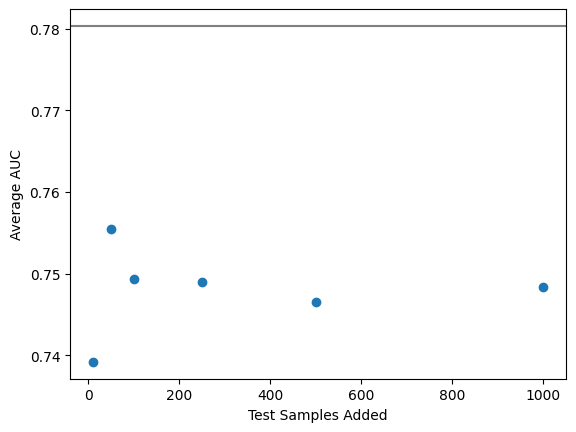

In [37]:
plt.scatter(train_nums, df_train_num.mean(axis=0).values)
plt.axhline(y=df_base_mean, color='gray')
plt.ylabel("Average AUC")
plt.xlabel("Test Samples Added")
plt.show()